In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)
#pd.set_option("display.max_rows", None)
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
    

In [4]:
total = pd.read_csv('../data/DataFrames/total', sep = ',' )
total.head()

,Unnamed: 0,Joueur,Poste,Cote,Enchère moy,Note,Note série,Note 1 an,Nb match,Nb match série,Nb match 1 an,Variation,Var série,Var 1 an,But,Buts série,Buts 1 an,%Titu,%Titu série,%Titu 1 an,Temps,Tps série,Tps 1 an,Tps moy,Tps moy série,Tps moy 1 an,Min/But,Min/But 1 an,Min note/but,Prix/but,Cleansheet,But/Peno,But/Coup-franc,But/surface,Pass decis.,Occas° créée,Corner gagné,%Passes,Ballons,Interceptions,Tacles,%Duel,Fautes,But évité,Action stoppée,DMI,Club,Prochain opposant,Date,Victoire probable,%Win+12J,%Win+16J,%Win+20J,Championnat,Classement,pts,J.,G.,N.,P.,p.,c.,+/-,Var E/C,Classement_range,Note_range,Enchère_moy_range
0,0,Mbappé Kylian,A,49.0,111.0,6.12,4.50,6.37,17,1,35,1.31,0.00,1.49,13,0,32,0.88,0.00,0.94,1361,35,2960,80.06,35.0,84.57,105.0,93.0,5.0,3.77,7.5,2.0,0.0,2.0,2.0,12.0,32.0,0.8256,891.0,3.0,2.0,37.91,9.0,0.0,0.0,5.75,Paris SG,Reims,dim. 29/01 20:45,50.0,0.78322,0.80856,0.0,Ligue 1,1,47,19,15,2,2,48,14,34,62.0,1 - 1-5,4 - entre 6 et 8,5 - 80 et plus
1,1,Neymar,A,41.0,70.0,6.38,4.50,6.31,17,2,29,1.40,0.00,1.40,11,0,21,0.88,1.00,0.93,1325,180,2355,77.94,90.0,81.21,120.0,112.0,4.5,3.73,7.0,2.0,0.0,0.0,10.0,12.0,10.0,0.8212,1381.0,2.0,12.0,49.51,22.0,0.0,0.0,4.5,Paris SG,Reims,dim. 29/01 20:45,50.0,0.78322,0.80856,0.0,Ligue 1,1,47,19,15,2,2,48,14,34,29.0,1 - 1-5,4 - entre 6 et 8,4 - entre 60 et 80
2,2,Messi Lionel,A,40.0,76.0,7.03,6.00,6.68,15,2,31,1.25,1.41,1.30,8,1,13,1.00,1.00,0.97,1312,180,2689,87.47,90.0,86.74,164.0,207.0,6.5,5.00,9.0,0.0,1.0,2.0,10.0,15.0,21.0,0.8355,1240.0,0.0,11.0,51.52,3.0,0.0,0.0,5.5,Paris SG,Reims,dim. 29/01 20:45,50.0,0.78322,0.80856,0.0,Ligue 1,1,47,19,15,2,2,48,14,34,36.0,1 - 1-5,4 - entre 6 et 8,4 - entre 60 et 80
3,3,Hakimi Achraf,DL,21.0,28.0,5.38,4.50,5.44,17,1,32,1.19,0.00,1.01,3,0,4,0.76,0.00,0.81,1211,34,2365,71.24,34.0,73.91,404.0,591.0,6.0,7.00,7.0,0.0,0.0,1.0,1.0,4.0,6.0,0.8565,927.0,3.0,17.0,46.09,15.0,0.0,0.0,"5,00",Paris SG,Reims,dim. 29/01 20:45,50.0,0.78322,0.80856,0.0,Ligue 1,1,47,19,15,2,2,48,14,34,7.0,1 - 1-5,3 - entre 4 et 6,2 - entre 20 et 40
4,4,Ekitike Hugo,MO,13.0,13.0,5.04,5.67,5.17,13,6,21,1.09,1.37,1.14,3,3,6,0.46,0.83,0.52,505,372,943,38.85,62.0,44.90,168.0,157.0,6.0,4.33,1.0,0.0,0.0,0.0,2.0,1.0,3.0,0.7718,239.0,4.0,4.0,39.29,7.0,0.0,0.0,"3,00",Paris SG,Reims,dim. 29/01 20:45,50.0,0.78322,0.80856,0.0,Ligue 1,1,47,19,15,2,2,48,14,34,0.0,1 - 1-5,3 - entre 4 et 6,1 - moins de 20


In [5]:
X = total.drop(['Note','DMI','Club','Prochain opposant','Date','Championnat','Classement_range','Note_range','Enchère_moy_range'],axis=1)
Y = total['Note']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 58 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2359 non-null   int64  
 1   Joueur             2359 non-null   object 
 2   Poste              2359 non-null   object 
 3   Cote               2359 non-null   float64
 4   Enchère moy        2359 non-null   float64
 5   Note série         2359 non-null   float64
 6   Note 1 an          2359 non-null   float64
 7   Nb match           2359 non-null   int64  
 8   Nb match série     2359 non-null   int64  
 9   Nb match 1 an      2359 non-null   int64  
 10  Variation          2359 non-null   float64
 11  Var série          2359 non-null   float64
 12  Var 1 an           2359 non-null   float64
 13  But                2359 non-null   int64  
 14  Buts série         2359 non-null   int64  
 15  Buts 1 an          2359 non-null   int64  
 16  %Titu              2359 

#1 séparer les colonnes numériques et les colonnes catégorielles 

num_train = X_train[['Cote','Enchère moy','Note série', 'Note 1 an', 'Nb match', 'Nb match série', 
            'Nb match 1 an', 'Variation', 'Var série', 'Var 1 an', 'But', 'Buts série', 'Buts 1 an', 
            '%Titu', '%Titu série', '%Titu 1 an', 'Temps', 'Tps série', 'Tps 1 an', 'Tps moy', 'Tps moy série', 
            'Tps moy 1 an', 'Min/But', 'Min/But 1 an', 'Min note/but', 'Prix/but',  'Cleansheet', 'But/Peno', 'But/Coup-franc', 'But/surface', 'Pass decis.', 'Occas° créée', 'Corner gagné', 
            '%Passes', 'Ballons', 'Interceptions', 'Tacles', '%Duel', 'Fautes', 'But évité', 'Action stoppée', 'DMI', 'Club', 
            'Prochain opposant', 'Date', 'Victoire probable', '%Win+12J', '%Win+16J', '%Win+20J', 'Championnat', 'Classement', 
            'pts', 'J.', 'G.', 'N.', 'P.', 'p.', 'c.', '+/-']]

num_test = X_test[['Cote','Enchère moy','Note série', 'Note 1 an', 'Nb match', 'Nb match série', 
            'Nb match 1 an', 'Variation', 'Var série', 'Var 1 an', 'But', 'Buts série', 'Buts 1 an', 
            '%Titu', '%Titu série', '%Titu 1 an', 'Temps', 'Tps série', 'Tps 1 an', 'Tps moy', 'Tps moy série', 
            'Tps moy 1 an', 'Min/But', 'Min/But 1 an', 'Min note/but', 'Prix/but',  'Cleansheet', 'But/Peno', 'But/Coup-franc', 'But/surface', 'Pass decis.', 'Occas° créée', 'Corner gagné', 
            '%Passes', 'Ballons', 'Interceptions', 'Tacles', '%Duel', 'Fautes', 'But évité', 'Action stoppée', 'DMI', 'Club', 
            'Prochain opposant', 'Date', 'Victoire probable', '%Win+12J', '%Win+16J', '%Win+20J', 'Championnat', 'Classement', 
            'pts', 'J.', 'G.', 'N.', 'P.', 'p.', 'c.', '+/-']]
            
#'j19', 'j18', 'j17', 'j16', 'j15', 'j14', 'j13', 'j12', 'j11', 'j10', 'j9', 'j8', 'j7', 'j6', 'j5', 'j4', 'j3', 'j2', 'j1', 'j38', 'j37', 'j36', 'j35', 'j34', 'j33', 'j32', 'j31', 'j30', 'j29', 'j28', 'j27', 'j26', 'j25', 'j24', 'j23', 'j22', 'j21', 'j20',


cat_train = X_train[['Poste','Club','Prochain opposant','Championnat']]
cat_test = X_test[['Poste','Club','Prochain opposant','Championnat']]

In [8]:
#PENSER A RAJOUTER DMI A LA LISTE
cols = ['Cote', 'Enchère moy', 'Note série', 'Note 1 an', 'Nb match', 'Nb match série', 
        'Nb match 1 an', 'Variation', 'Var série', 'Var 1 an', 'But', 'Buts série', 'Buts 1 an', 
        '%Titu', '%Titu série', '%Titu 1 an', 'Temps', 'Tps série', 'Tps 1 an', 'Tps moy', 'Tps moy série',
        'Tps moy 1 an', 'Min/But', 'Min/But 1 an', 'Min note/but', 'Prix/but',  'Cleansheet', 'But/Peno', 
        'But/Coup-franc', 'But/surface', 'Pass decis.', 'Occas° créée', 'Corner gagné', 
        '%Passes', 'Ballons', 'Interceptions', 'Tacles', '%Duel', 'Fautes', 'But évité', 'Action stoppée', 
        'Victoire probable', '%Win+12J', '%Win+16J', '%Win+20J', 'Classement', 'pts', 'J.', 'G.', 'N.', 'P.', 'p.', 
        'c.', '+/-','Var E/C']


sc = StandardScaler()

X_train_out_num = sc.fit_transform(X_train[cols])

X_test_out_num = sc.transform(X_test[cols])

In [9]:
X_train_out_num = pd.DataFrame(X_train_out_num, columns = ['Cote', 'Enchère moy', 'Note série', 'Note 1 an', 'Nb match', 'Nb match série', 
        'Nb match 1 an', 'Variation', 'Var série', 'Var 1 an', 'But', 'Buts série', 'Buts 1 an', 
        '%Titu', '%Titu série', '%Titu 1 an', 'Temps', 'Tps série', 'Tps 1 an', 'Tps moy', 'Tps moy série',
        'Tps moy 1 an', 'Min/But', 'Min/But 1 an', 'Min note/but', 'Prix/but',  'Cleansheet', 'But/Peno', 
        'But/Coup-franc', 'But/surface', 'Pass decis.', 'Occas° créée', 'Corner gagné', 
        '%Passes', 'Ballons', 'Interceptions', 'Tacles', '%Duel', 'Fautes', 'But évité', 'Action stoppée', 
        'Victoire probable', '%Win+12J', '%Win+16J', '%Win+20J', 'Classement', 'pts', 'J.', 'G.', 'N.', 'P.', 'p.', 
        'c.', '+/-','Var E/C'])
X_train_out_num

,Cote,Enchère moy,Note série,Note 1 an,Nb match,Nb match série,Nb match 1 an,Variation,Var série,Var 1 an,But,Buts série,Buts 1 an,%Titu,%Titu série,%Titu 1 an,Temps,Tps série,Tps 1 an,Tps moy,Tps moy série,Tps moy 1 an,Min/But,Min/But 1 an,Min note/but,Prix/but,Cleansheet,But/Peno,But/Coup-franc,But/surface,Pass decis.,Occas° créée,Corner gagné,%Passes,Ballons,Interceptions,Tacles,%Duel,Fautes,But évité,Action stoppée,Victoire probable,%Win+12J,%Win+16J,%Win+20J,Classement,pts,J.,G.,N.,P.,p.,c.,+/-,Var E/C
0,1.718645,1.849028,0.963482,-0.034966,1.255174,0.086473,1.671080,0.879290,1.395725,0.624922,1.526858,1.195978,2.478310,0.914564,1.386776,0.928202,1.465064,0.091093,1.945090,0.881240,1.003933,0.945699,0.366266,-0.192323,0.850281,-1.213788,1.048594,-0.194642,-0.115872,-0.277776,3.070706,0.061537,1.867162,0.340161,0.490393,-0.090174,0.002597,0.067661,0.535423,-0.204854,-0.202428,0.210735,-1.163756,-0.750361,-0.450721,0.054707,0.270147,1.493770,0.317027,-0.469041,0.292421,-0.151677,0.294621,-0.265452,1.650532
1,0.797446,0.358889,0.875074,0.469667,1.078459,2.172283,1.483460,0.744569,1.314182,0.391006,-0.525631,-0.348725,-0.585883,1.063229,1.386776,1.093442,1.616223,2.611952,2.057867,1.233930,1.443014,1.262785,-0.614574,-0.667302,-1.049449,0.827526,2.500011,-0.194642,-0.115872,-0.277776,-0.486883,-0.513312,-0.670931,-1.632360,-0.954500,-0.761677,-0.837356,-1.481822,-0.925667,3.739636,3.075110,0.210735,-1.706106,-0.994640,0.860079,-0.462314,0.062840,-1.082778,0.026906,0.077642,-0.340013,0.076655,-0.750398,0.475208,-0.183324
2,0.183312,0.008268,0.905825,0.949068,0.371598,-0.394868,0.639170,0.205687,-0.092433,0.098612,-0.525631,-0.348725,-0.585883,0.646969,1.386776,0.862106,0.605943,-0.287439,0.991311,0.757859,1.443014,0.979099,-0.614574,-0.667302,-1.049449,0.827526,1.255939,-0.194642,-0.115872,-0.277776,-0.486883,-0.513312,-0.670931,0.797672,0.953898,2.192936,1.402518,1.332154,0.170151,-0.204854,-0.202428,0.210735,0.184810,0.426861,2.426711,-0.806994,0.270147,-2.371052,0.317027,-0.469041,-0.656229,-0.608341,-1.403535,0.401142,-0.183324
3,-0.430821,-0.517663,0.617537,-1.271317,-0.865408,-0.555315,-1.330839,0.205687,-0.805933,0.010893,-0.525631,-0.348725,-0.585883,0.646969,1.386776,0.630769,-0.566978,-0.529055,-1.004320,0.378192,0.639817,0.327142,-0.614574,-0.667302,-1.049449,0.827526,0.011867,-0.194642,-0.115872,-0.277776,-0.486883,-0.513312,-0.670931,0.682443,-0.232054,-0.090174,0.422573,0.641317,-0.316879,-0.204854,-0.202428,0.210735,0.051565,0.160182,-0.309857,1.261089,-0.870040,-1.082778,-0.553337,-1.562408,1.241071,-1.293338,0.425248,-1.080179,-0.516752
4,1.258045,1.147786,1.051890,0.848142,1.255174,2.332730,1.483460,1.067899,1.558811,0.917316,2.553103,4.285383,1.865471,1.063229,1.386776,0.729913,1.665972,2.664302,1.527274,1.100233,1.352788,0.683701,0.083478,-0.145266,1.008592,-1.218571,1.255939,-0.194642,-0.115872,-0.277776,2.181309,4.660326,5.328198,0.621139,2.168333,0.447028,1.542510,0.137480,0.900696,-0.204854,-0.202428,0.210735,0.821766,-1.114406,-0.450721,-0.806994,0.581107,0.205496,0.607149,-0.469041,-0.340013,1.446649,0.294621,0.771472,0.816961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1882,1.104512,1.060131,1.001920,0.646289,1.078459,2.172283,0.826790,0.852346,1.395725,1.414387,1.526858,2.740680,2.171891,0.884832,1.250037,0.663817,0.835552,1.790458,0.572422,0.334552,0.836065,0.174021,0.157359,-0.349669,0.850281,-1.215841,1.877975,2.287046,-0.115872,-0.277776,-0.486883,0.636385,0.482748,0.813282,0.764870,-0.358776,0.142589,0.499638,1.144211,-0.204854,-0.202428,0.210735,-1.706106,-0.994640,0.860079,-0.462314,0.062840,-1.082778,0.026906,0.077642,-0.340013,0.076655,-0.750398,0.475208,0.816961
1883,-1.505554,-1.131249,-1.112188,-3.340312,-1.748984,-0.715762,-1.799888,-1.114577,-0.805933,-1.421840,-0.525631,-0.348725,-0.585883,1.063229,-0.892211

In [10]:
X_test_out_num = pd.DataFrame(X_test_out_num, columns = ['Cote', 'Enchère moy', 'Note série', 'Note 1 an', 'Nb match', 'Nb match série', 
        'Nb match 1 an', 'Variation', 'Var série', 'Var 1 an', 'But', 'Buts série', 'Buts 1 an', 
        '%Titu', '%Titu série', '%Titu 1 an', 'Temps', 'Tps série', 'Tps 1 an', 'Tps moy', 'Tps moy série',
        'Tps moy 1 an', 'Min/But', 'Min/But 1 an', 'Min note/but', 'Prix/but',  'Cleansheet', 'But/Peno', 
        'But/Coup-franc', 'But/surface', 'Pass decis.', 'Occas° créée', 'Corner gagné', 
        '%Passes', 'Ballons', 'Interceptions', 'Tacles', '%Duel', 'Fautes', 'But évité', 'Action stoppée', 
        'Victoire probable', '%Win+12J', '%Win+16J', '%Win+20J', 'Classement', 'pts', 'J.', 'G.', 'N.', 'P.', 'p.', 
        'c.', '+/-','Var E/C'])
X_test_out_num

,Cote,Enchère moy,Note série,Note 1 an,Nb match,Nb match série,Nb match 1 an,Variation,Var série,Var 1 an,But,Buts série,Buts 1 an,%Titu,%Titu série,%Titu 1 an,Temps,Tps série,Tps 1 an,Tps moy,Tps moy série,Tps moy 1 an,Min/But,Min/But 1 an,Min note/but,Prix/but,Cleansheet,But/Peno,But/Coup-franc,But/surface,Pass decis.,Occas° créée,Corner gagné,%Passes,Ballons,Interceptions,Tacles,%Duel,Fautes,But évité,Action stoppée,Victoire probable,%Win+12J,%Win+16J,%Win+20J,Classement,pts,J.,G.,N.,P.,p.,c.,+/-,Var E/C
0,0.336846,0.095924,0.809729,-0.262051,0.548313,-0.555315,1.014410,-0.333196,-0.805933,0.157090,-0.525631,-0.348725,-0.279463,0.676702,-0.892211,0.895154,0.910175,-0.504893,1.403756,0.972091,0.961096,1.047201,-0.614574,3.333994,1.325213,0.827526,-0.817514,-0.194642,-0.115872,-0.277776,-0.486883,-0.513312,-0.670931,-1.632360,-0.954500,-0.761677,-0.837356,-1.481822,-0.925667,-0.204854,-0.202428,0.210735,-1.706106,-1.484446,-0.450721,0.916408,-0.455427,0.205496,-0.553337,0.624326,0.292421,-0.380009,-0.358516,-0.043254,-0.183324
1,0.336846,0.271234,-1.112188,0.419204,-1.395553,-0.715762,-0.017499,0.717625,-0.805933,1.268190,-0.525631,-0.348725,0.946214,-0.423413,-0.892211,0.002855,-1.110386,-0.649863,-0.161171,-0.402565,-0.966577,-0.030285,-0.614574,-0.295260,0.850281,0.827526,-0.402823,-0.194642,-0.115872,-0.277776,0.402515,0.061537,-0.209460,0.033924,-0.667075,-0.493076,0.142589,0.614778,-0.560394,-0.204854,-0.202428,-1.306427,-1.706106,-0.735684,-0.450721,-0.289974,0.373800,0.205496,0.317027,0.077642,-0.340013,1.104150,0.033366,0.697406,0.150105
2,0.029779,-0.254697,-1.112188,-0.388209,0.194883,-0.715762,-0.767979,-0.090699,-0.805933,-0.310741,-0.012509,-0.348725,-0.279463,0.141511,-0.892211,0.068951,-0.000608,-0.649863,-0.686394,0.028676,-0.966577,-0.055010,1.359844,0.472354,0.850281,-1.202499,0.426558,-0.194642,-0.115872,-0.277776,-0.486883,-0.513312,0.713483,0.573174,-0.014543,-0.358776,0.422573,0.268135,1.022453,-0.204854,-0.202428,-4.843309,0.054187,0.226948,1.922855,0.227047,-0.351773,-1.082778,-0.553337,1.171009,-0.340013,-0.950840,-0.358516,-0.413584,-0.516752
3,-0.277287,-0.342352,0.755915,-0.438672,0.901744,0.407367,0.920600,-0.467917,-0.316676,-0.252262,-0.525631,-0.348725,-0.279463,-0.155818,0.406812,0.135047,0.406948,0.079012,0.707755,-0.030833,0.417867,0.259474,-0.614574,2.381095,0.217038,0.827526,0.219212,-0.194642,-0.115872,-0.277776,-0.486883,1.211234,0.482748,0.598150,1.355257,0.984231,1.122534,0.899768,1.144211,-0.204854,-0.202428,-1.378582,1.255224,-1.626994,-0.450721,-0.117633,0.373800,1.493770,0.317027,0.077642,-0.023796,-0.265843,-0.489143,0.104878,-0.350038
4,-0.430821,-0.430008,1.001920,-0.186356,0.548313,-0.394868,-0.205119,-0.090699,-0.805933,0.040133,-0.525631,-0.348725,-0.585883,0.468572,-0.892211,0.234191,0.479657,-0.535095,-0.193393,0.377002,-0.203540,0.176190,-0.614574,-0.667302,-1.049449,0.827526,-0.195478,-0.194642,-0.115872,-0.277776,-0.486883,0.061537,-0.440195,0.593893,1.093726,2.058635,1.402518,1.065537,1.144211,-0.204854,-0.202428,0.210735,0.608339,0.681596,-0.450721,0.916408,-1.077347,0.205496,-1.423702,2.264376,0.292421,-0.037511,1.209013,-0.709849,-0.350038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,0.336846,0.358889,-1.112188,-0.741452,0.548313,-0.715762,0.732980,0.313463,-0.805933,0.127851,1.013736,-0.348725,0.946214,-1.315398,-0.892211,-1.286022,-0.785106,-0.649863,-0.572542,-1.371369,-0.966577,-1.323356,-0.303763,-0.408490,0.850281,-1.216190,-0.817514,-0.194642,-0.115872,2.254414,0.402515,0.636385,0.713483,0.145179,-0.493584,-0.761677,-0.277388,0.002742,-0.195122,-0.204854,-0.202428,3.696641,1.986318,2.102857,4.117567,-1.324015,1.203028,-1.082778,1.477514,-2.109091,-0.656229,1.560815,-0.097261,1.067736,0.316819
468,0.643912,0.446545,0.840479,0.242582,0.725029,0.246920,1.014410,0.178742,0.947239,-0.

In [11]:
oneh = OneHotEncoder(sparse = False)


X_train_out = oneh.fit_transform(np.array(X_train['Poste']).reshape(-1,1))

X_train_out_cat = pd.DataFrame(X_train_out, columns=X_train['Poste'].unique())

X_train_out_cat

,A,G,DC,DL,MO,MD
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
1882,0.0,0.0,0.0,0.0,0.0,1.0
1883,0.0,1.0,0.0,0.0,0.0,0.0
1884,1.0,0.0,0.0,0.0,0.0,0.0
1885,0.0,0.0,0.0,0.0,0.0,1.0


In [12]:
oneh = OneHotEncoder(sparse = False)


X_test_out = oneh.fit_transform(np.array(X_test['Poste']).reshape(-1,1))

X_test_out_cat = pd.DataFrame(X_test_out, columns=X_test['Poste'].unique())

X_test_out_cat

,DC,MO,MD,DL,G,A
0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
467,1.0,0.0,0.0,0.0,0.0,0.0
468,0.0,0.0,0.0,0.0,0.0,1.0
469,0.0,0.0,0.0,0.0,1.0,0.0
470,0.0,1.0,0.0,0.0,0.0,0.0


In [13]:
X_train = pd.concat([X_train_out_num, X_train_out_cat],1)

X_test = pd.concat([X_test_out_num, X_test_out_cat],1)


C:\Users\sitte\AppData\Local\Temp\ipykernel_7756\3126381643.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  X_train = pd.concat([X_train_out_num, X_train_out_cat],1)
C:\Users\sitte\AppData\Local\Temp\ipykernel_7756\3126381643.py:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  X_test = pd.concat([X_test_out_num, X_test_out_cat],1)


In [15]:
# 1 REGRESSION LINEAIRE
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.8267891396244896
0.8283178247161663


C:\Users\sitte\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


C:\Users\sitte\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


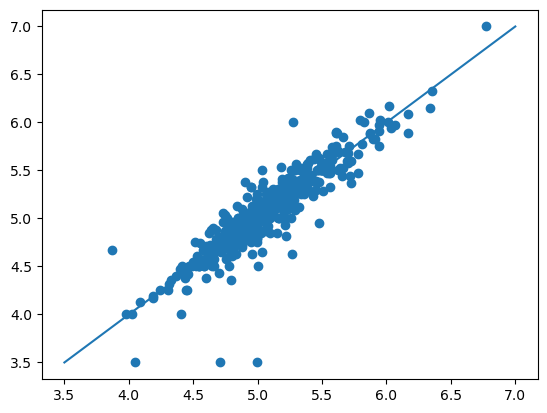

In [21]:
pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)
plt.scatter(pred_test, y_test)
plt.plot((y_test.min(), y_test.max()), (y_test.min(), y_test.max()));

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print('rmse train :', np.sqrt(mean_squared_error(y_train, pred_train)))
print('rmse test : ', np.sqrt(mean_squared_error(y_test, pred_test)))
print('mse train : ',((mean_squared_error(y_train, pred_train))))
print('mse test : ',((mean_squared_error(y_test, pred_test))))
print('mae train : ',((mean_absolute_error(y_train, pred_train))))
print('mae test : ',((mean_absolute_error(y_test, pred_test))))


rmse train : 0.18722069829860316
rmse test :  0.17303793571128268
mse train :  0.035051589871416586
mse test :  0.029942127195221997
mae train :  0.11393663554035043
mae test :  0.10957214896732098


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test))

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, pred_test)
confusion_matrix
#(pd.crosstab(y_test,pred_test, rownames=['Realité'], colnames=['Prédiction']))

In [ ]:
# 2 REGRESSION XGBOOST
import xgboost as xgb

In [38]:
# 3 RIDGE
from sklearn.linear_model import RidgeCV

ridge_reg = RidgeCV(alphas= (0.001, 0.01, 0.1, 0.3, 0.7, 1, 10, 50, 100))

ridge_reg.fit(X_train, y_train)

RidgeCV(alphas=array([1.e-03, 1.e-02, 1.e-01, 3.e-01, 7.e-01, 1.e+00, 1.e+01, 5.e+01,
       1.e+02]))

In [39]:
print('alpha sélectionné par c-v :', ridge_reg.alpha_)
print('score train :', ridge_reg.score(X_train, y_train))
print('score test :', ridge_reg.score(X_test, y_test))

alpha sélectionné par c-v : 10.0
score train : 0.8258359768921326
score test : 0.8220034868412278


C:\Users\sitte\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [40]:
ridge_pred_train = ridge_reg.predict(X_train)
ridge_pred_test = ridge_reg.predict(X_test)

print('rmse train :', np.sqrt(mean_squared_error(ridge_pred_train, y_train)))
print('rmse test : ', np.sqrt(mean_squared_error(ridge_pred_test, y_test)))
print('mse train :', mean_squared_error(ridge_pred_train, y_train))
print('mse test :', mean_squared_error(ridge_pred_test, y_test))
print('mae train : ',((mean_absolute_error(ridge_pred_train, y_train))))
print('mae test : ',((mean_absolute_error(ridge_pred_test, y_test))))

rmse train : 0.18773512032836961
rmse test :  0.17619130375616684
mse train : 0.03524447540470742
mse test : 0.031043375519297853
mae train :  0.11376456099877566
mae test :  0.10927058027591617


C:\Users\sitte\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


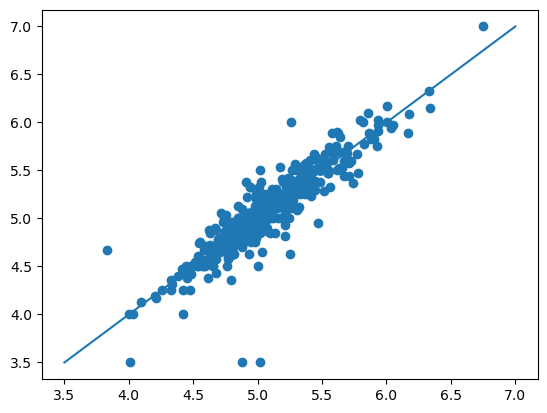

In [44]:

plt.scatter(ridge_pred_test, y_test)
plt.plot((y_test.min(), y_test.max()), (y_test.min(), y_test.max()));

In [41]:
# 4 LASSO
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

lasso_reg = LassoCV(alphas= (0.001, 0.01, 0.1, 0.3, 0.7, 1, 10, 50, 100))

lasso_reg.fit(X_train, y_train)

LassoCV(alphas=(0.001, 0.01, 0.1, 0.3, 0.7, 1, 10, 50, 100))

In [42]:
print('alpha sélectionné par c-v :', lasso_reg.alpha_)
print('score train :', lasso_reg.score(X_train, y_train))
print('score test :', lasso_reg.score(X_test, y_test))

alpha sélectionné par c-v : 0.001
score train : 0.8221559519001856
score test : 0.8145785583687092


C:\Users\sitte\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [43]:
lasso_pred_train = lasso_reg.predict(X_train)
lasso_pred_test = lasso_reg.predict(X_test)

print('rmse train :', np.sqrt(mean_squared_error(lasso_pred_train, y_train)))
print('rmse test : ', np.sqrt(mean_squared_error(lasso_pred_test, y_test)))
print('mse train :', mean_squared_error(lasso_pred_train, y_train))
print('mse test :', mean_squared_error(lasso_pred_test, y_test))
print('mae train : ',((mean_absolute_error(lasso_pred_train, y_train))))
print('mae test : ',((mean_absolute_error(lasso_pred_test, y_test))))

rmse train : 0.18970814126703459
rmse test :  0.1798285731827233
mse train : 0.035989178862993146
mse test : 0.03233831573293407
mae train :  0.1144591479437223
mae test :  0.1089799975220861


C:\Users\sitte\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


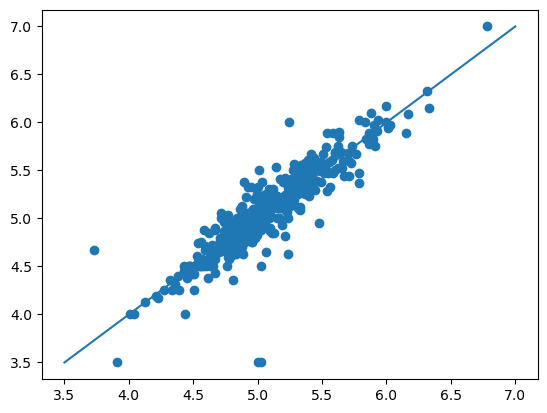

In [45]:
plt.scatter(lasso_pred_test, y_test)
plt.plot((y_test.min(), y_test.max()), (y_test.min(), y_test.max()));